In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity, mean_squared_error

plt.rcParams['figure.figsize'] = [12, 8]

---
## Зашумление изображения

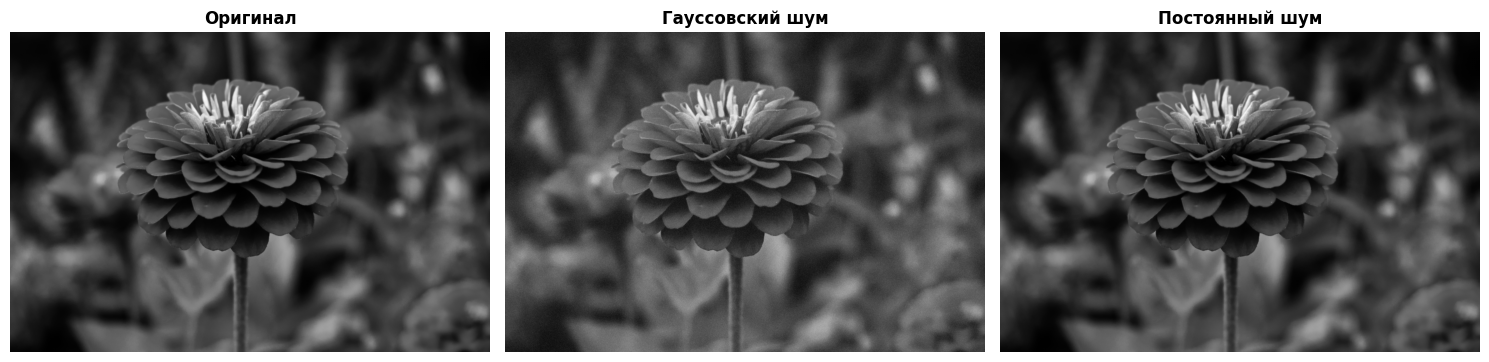

In [2]:
image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Гауссовский шум
def add_gauss_noise(img, mean=0, stddev=50):
    noise = np.zeros(img.shape, np.uint8)
    cv2.randn(noise, mean, stddev)
    return cv2.add(img, noise)

# Постоянный шум
def add_constant_noise(img, value=10):
    return cv2.add(img, np.full(img.shape, value, dtype=np.uint8))

image_gauss = add_gauss_noise(image_gray)
image_const = add_constant_noise(image_gray)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Оригинал', fontweight='bold')
axes[1].imshow(image_gauss, cmap='gray')
axes[1].set_title('Гауссовский шум', fontweight='bold')
axes[2].imshow(image_const, cmap='gray')
axes[2].set_title('Постоянный шум', fontweight='bold')
for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()

---
## Тестирование фильтров на гауссовском шуме

In [3]:
filters = {}

# Медианный фильтр
for k in [3, 5, 7]:
    filters[f'Median k={k}'] = cv2.medianBlur(image_gauss, k)

# Гауссовский фильтр
for k in [3, 5, 7]:
    filters[f'Gaussian k={k}'] = cv2.GaussianBlur(image_gauss, (k, k), 0)

# Билатеральный фильтр
for d, s in [(5, 50), (7, 75), (9, 100)]:
    filters[f'Bilateral d={d}'] = cv2.bilateralFilter(image_gauss, d, s, s)

# NLM фильтр
for h in [10, 20, 30]:
    filters[f'NLM h={h}'] = cv2.fastNlMeansDenoising(image_gauss, h=h)

print('ГАУССОВСКИЙ ШУМ')
print('=' * 55)
results = []
for name, filtered in filters.items():
    mse = mean_squared_error(image_gray, filtered)
    ssim_val, _ = structural_similarity(image_gray, filtered, full=True)
    results.append((name, mse, ssim_val))
    print(f'{name:<25} | MSE: {mse:8.2f} | SSIM: {ssim_val:.4f}')

best = max(results, key=lambda x: x[2])
print('=' * 55)
print(f'Лучший: {best[0]} (SSIM: {best[2]:.4f})')

ГАУССОВСКИЙ ШУМ
Median k=3                | MSE:   221.72 | SSIM: 0.3894
Median k=5                | MSE:   100.47 | SSIM: 0.6146
Median k=7                | MSE:    67.31 | SSIM: 0.7330
Gaussian k=3              | MSE:   522.43 | SSIM: 0.3643
Gaussian k=5              | MSE:   468.14 | SSIM: 0.4881
Gaussian k=7              | MSE:   440.90 | SSIM: 0.5959
Bilateral d=5             | MSE:   485.46 | SSIM: 0.2995
Bilateral d=7             | MSE:   378.43 | SSIM: 0.5320
Bilateral d=9             | MSE:   373.70 | SSIM: 0.6500
NLM h=10                  | MSE:  1244.14 | SSIM: 0.0913
NLM h=20                  | MSE:   419.42 | SSIM: 0.5319
NLM h=30                  | MSE:   386.33 | SSIM: 0.7364
Лучший: NLM h=30 (SSIM: 0.7364)


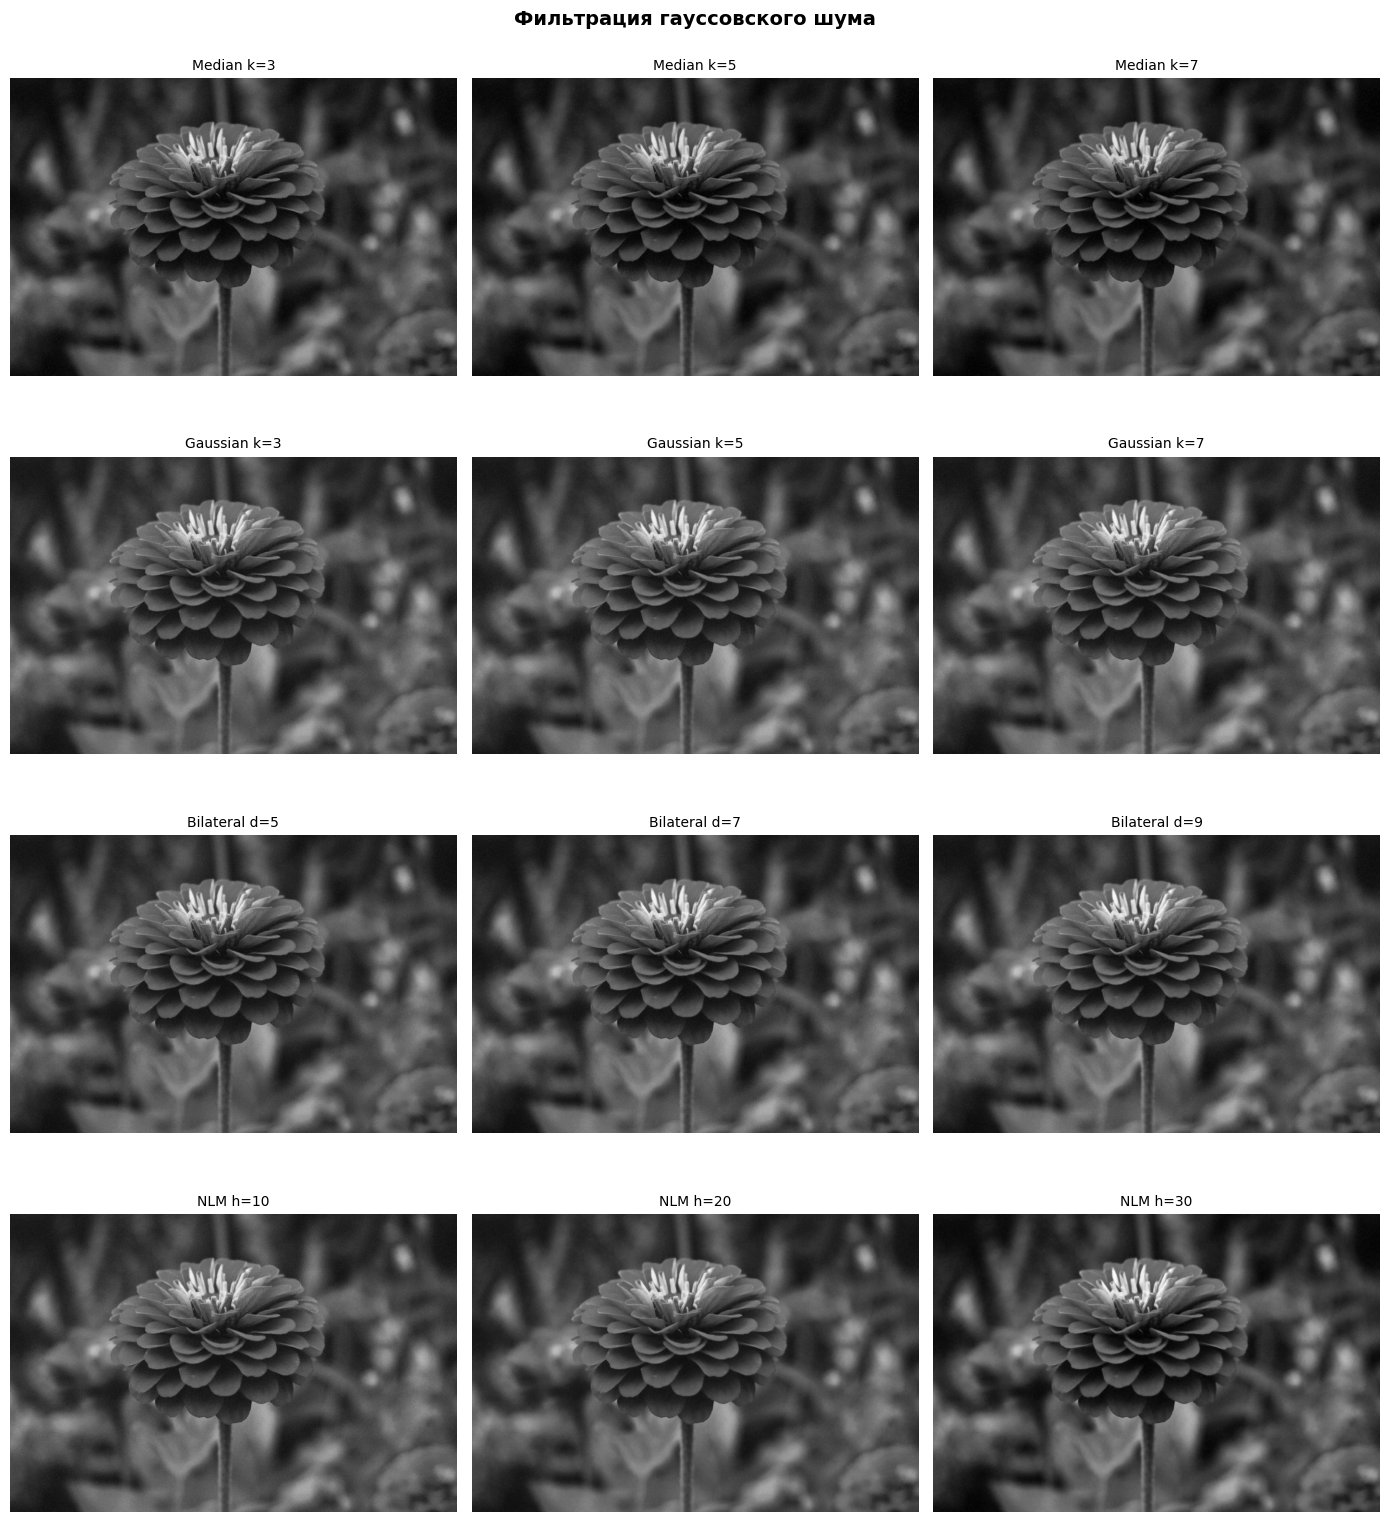

In [4]:
fig, axes = plt.subplots(4, 3, figsize=(14, 16))
axes = axes.flatten()

for idx, (name, img) in enumerate(filters.items()):
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(name, fontsize=10)
    axes[idx].axis('off')

plt.suptitle('Фильтрация гауссовского шума', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## Тестирование фильтров на постоянном шуме

In [5]:
filters_c = {}

for k in [3, 5, 7]:
    filters_c[f'Median k={k}'] = cv2.medianBlur(image_const, k)
for k in [3, 5, 7]:
    filters_c[f'Gaussian k={k}'] = cv2.GaussianBlur(image_const, (k, k), 0)
for d, s in [(5, 50), (7, 75), (9, 100)]:
    filters_c[f'Bilateral d={d}'] = cv2.bilateralFilter(image_const, d, s, s)
for h in [10, 20, 30]:
    filters_c[f'NLM h={h}'] = cv2.fastNlMeansDenoising(image_const, h=h)

print('ПОСТОЯННЫЙ ШУМ')
print('=' * 55)
results_c = []
for name, filtered in filters_c.items():
    mse = mean_squared_error(image_gray, filtered)
    ssim_val, _ = structural_similarity(image_gray, filtered, full=True)
    results_c.append((name, mse, ssim_val))
    print(f'{name:<25} | MSE: {mse:8.2f} | SSIM: {ssim_val:.4f}')

best_c = max(results_c, key=lambda x: x[2])
print('=' * 55)
print(f'Лучший: {best_c[0]} (SSIM: {best_c[2]:.4f})')

ПОСТОЯННЫЙ ШУМ
Median k=3                | MSE:   106.13 | SSIM: 0.8637
Median k=5                | MSE:   110.01 | SSIM: 0.8087
Median k=7                | MSE:   109.98 | SSIM: 0.8069
Gaussian k=3              | MSE:   105.45 | SSIM: 0.8940
Gaussian k=5              | MSE:   107.67 | SSIM: 0.8604
Gaussian k=7              | MSE:   109.74 | SSIM: 0.8344
Bilateral d=5             | MSE:   100.19 | SSIM: 0.8380
Bilateral d=7             | MSE:   111.81 | SSIM: 0.8091
Bilateral d=9             | MSE:   111.96 | SSIM: 0.8080
NLM h=10                  | MSE:   111.72 | SSIM: 0.8090
NLM h=20                  | MSE:   112.57 | SSIM: 0.8043
NLM h=30                  | MSE:   113.08 | SSIM: 0.8028
Лучший: Gaussian k=3 (SSIM: 0.8940)


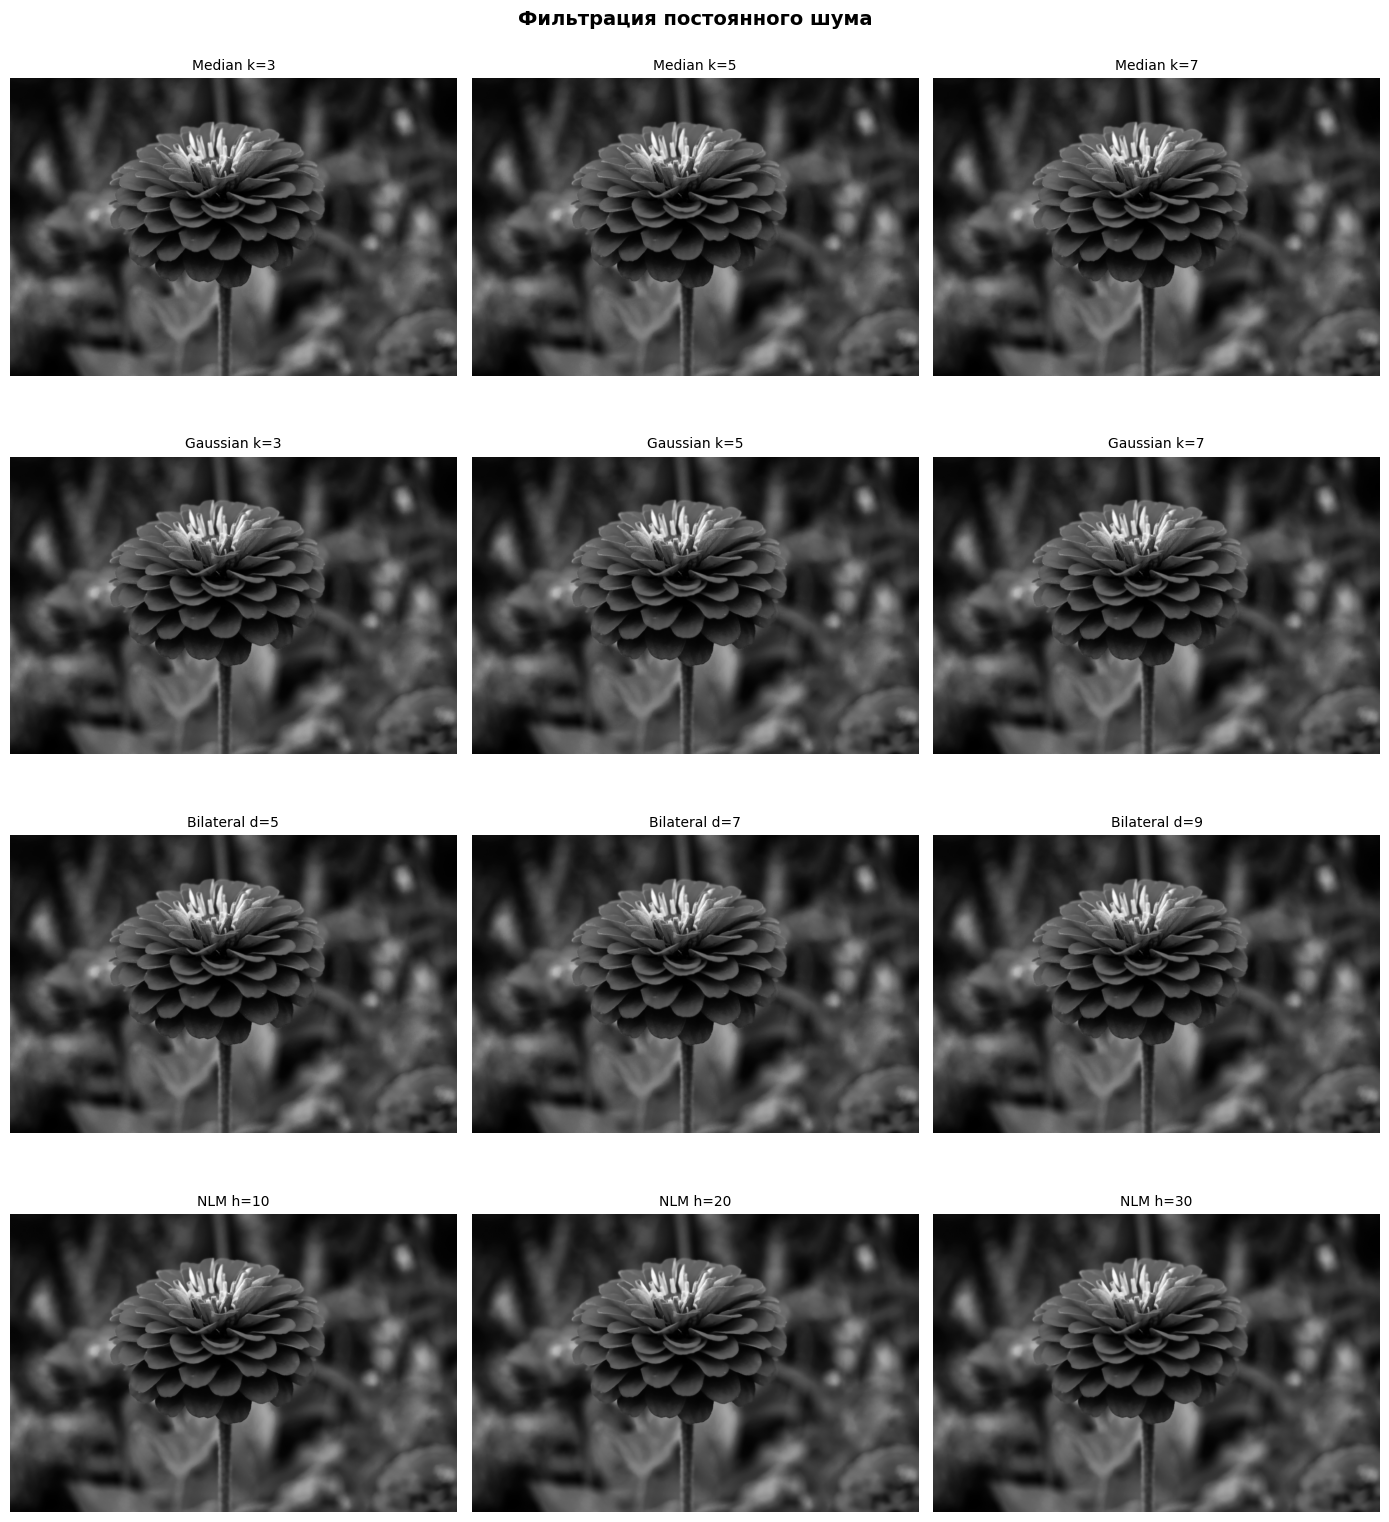

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(14, 16))
axes = axes.flatten()

for idx, (name, img) in enumerate(filters_c.items()):
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(name, fontsize=10)
    axes[idx].axis('off')

plt.suptitle('Фильтрация постоянного шума', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()